In [ ]:
'''
ANN(Artificial Neural Network)
人工神經網路，演算法基於模擬人類神經的判斷方式，人類神經受到一定強度的激發繼續望下層傳遞
把給個特徵乘上一定的係數在加起來，若超過一定值為正類，否值為負累
步驟:
1.假設給定一個特徵向量[a,b,c]
2.乘上係數score = w1*a+w2*b+w3*c
3.讓我們的score經過一個啟動函數(Activation Function)，我們設定函數超過一定的量輸出1,否則出為0

'''

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 10)

In [3]:
#使用scikit-learn iris data
iris = load_iris()
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])

In [4]:
df["target"]=iris["target"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#只留花瓣和花萼長度觀察決策邊界
df = df.drop(["sepal width (cm)","petal width (cm)"], axis = 1)

In [6]:
from sklearn.model_selection import train_test_split
data = df.drop(["target"],axis =1)
data_train, data_test, target_train, target_test=train_test_split(data,df["target"],test_size = 0.1)

In [7]:
#使用Perceptron感知器
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf = clf.fit(data_train, target_train)

from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("predict",list(predict))
print("targetlist",list(target_test))
print("accuracy",accuracy_score(target_test,predict)*100, '%')

predict [2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0]
targetlist [2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0]
accuracy 66.66666666666666 %


In [8]:
!pip install mlxtend

jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.16 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


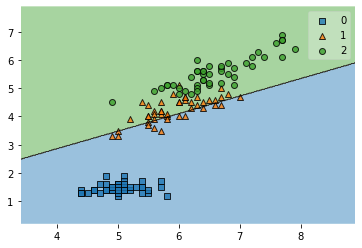

In [9]:
#使用剛剛的Perceptron來畫出決策邊界
from mlxtend.plotting import plot_decision_regions
import numpy as np
plot_decision_regions(X=np.array(data_train),y=np.array(target_train),clf = clf)

In [10]:
#發現感知器以直線做區隔，無法用直線分開的區域就沒辦法正確分類~
#線性分類器:線都是直的，二維一條線，三微一平面ex:f(x)=w1*x1+w2*x2....
#非線性分類器:使用多次方函式ex:f(x)=w1*(x1**2)+w2*x(x2**2)...或者像是決策樹使用多條直線切割

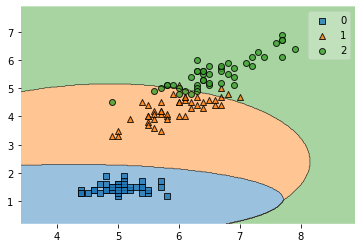

In [11]:
#使用非線性分類器
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(data_train, target_train)
plot_decision_regions(X=np.array(data_train),y=np.array(target_train),clf = clf)

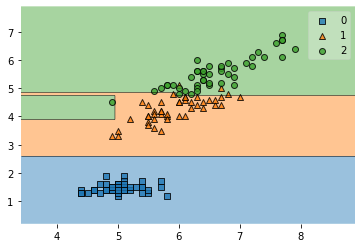

In [12]:
#使用決策樹
from sklearn.tree import DecisionTreeClassifier
#max_depth會改變切出來的區域
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(data_train, target_train)
plot_decision_regions(X=np.array(data_train),y=np.array(target_train),clf = clf)

In [13]:
#感知器問題1:沒辦法對XOR問題進行分類，Exclusive OR True+True = False,True+False = True

In [14]:
from numpy import random
x1 = random.choice([True,False],100)
x2 = random.choice([True,False],100)
y = np.logical_xor(x1, x2)
df= pd.DataFrame(columns=["x1","x2","y"])
df["x1"]=x1
df["x2"]=x2
df["y"]=y
df = df.astype(int) 
df.tail()

,x1,x2,y
95,0,1,1
96,1,1,0
97,1,1,0
98,0,1,1
99,1,1,0


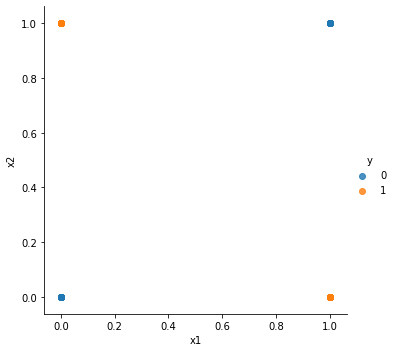

In [15]:
import seaborn as sns
sns.lmplot(x='x1',y="x2",hue="y",data=df,fit_reg=False)

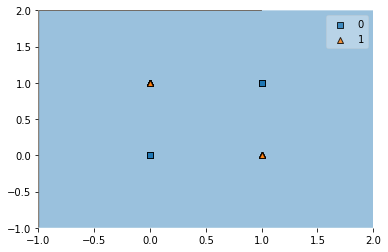

In [16]:
clf=Perceptron()
clf=clf.fit(df.drop(["y"],axis = 1),df["y"])
plot_decision_regions(X=np.array(df.drop(["y"],axis = 1)),y=np.array(df["y"]),clf = clf)
#全部分成一類

In [17]:
#感知器問題2:沒辦法解釋機率，後來發展出邏輯回歸加入sigmoid function改善
#小結:Perceptron感知器以較少使用由於現實的問題已非線性居多。